In [ ]:

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Rescaling
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
from tensorflow import keras
import os
import zipfile
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
zip_path = '/content/drive/My Drive/dataset_dogs_and_cats.zip'

extract_dir = '/content/dogs-vs-cats/'

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [ ]:
image_height, image_width = 256, 256
batch_size = 32

In [ ]:
train_dir = os.path.join(extract_dir, 'train')
validation_dir = os.path.join(extract_dir, 'test')

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = train_dir,
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (image_height, image_width)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = validation_dir,
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (image_height, image_width)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
print(train_ds.class_names)

['cats', 'dogs']


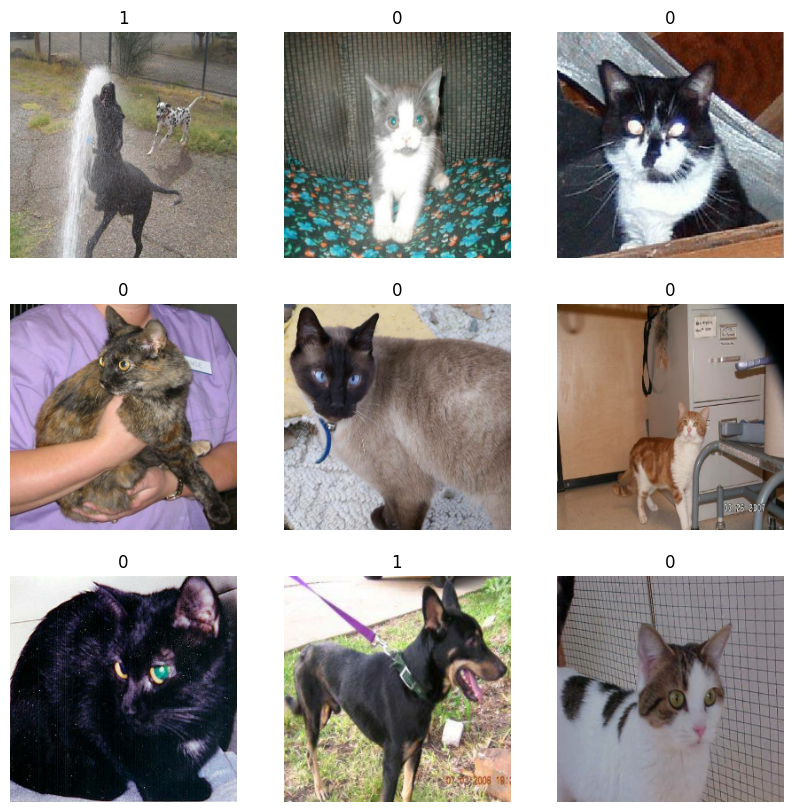

In [ ]:
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_ds.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(int(label[i]))
    plt.axis("off")

In [ ]:
model = Sequential()

model.add(Rescaling(1./255, input_shape=(image_height, image_width, 3)))

model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 128)      

In [ ]:

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs = 50, validation_data = validation_ds)

Epoch 1/50
625/625 [==============================] - 55s 84ms/step - loss: 0.5873 - accuracy: 0.6812 - val_loss: 0.5153 - val_accuracy: 0.7450
Epoch 2/50
625/625 [==============================] - 54s 86ms/step - loss: 0.4470 - accuracy: 0.7888 - val_loss: 0.4354 - val_accuracy: 0.8020
Epoch 3/50
625/625 [==============================] - 50s 80ms/step - loss: 0.3373 - accuracy: 0.8511 - val_loss: 0.4934 - val_accuracy: 0.8066
Epoch 4/50
625/625 [==============================] - 52s 83ms/step - loss: 0.2084 - accuracy: 0.9153 - val_loss: 0.6473 - val_accuracy: 0.7898
Epoch 5/50
625/625 [==============================] - 51s 80ms/step - loss: 0.1153 - accuracy: 0.9564 - val_loss: 0.7920 - val_accuracy: 0.7888
Epoch 6/50
625/625 [==============================] - 52s 83ms/step - loss: 0.0697 - accuracy: 0.9732 - val_loss: 1.1073 - val_accuracy: 0.7920
Epoch 7/50
625/625 [==============================] - 53s 85ms/step - loss: 0.0588 - accuracy: 0.9790 - val_loss: 1.0771 - val_accuracy:

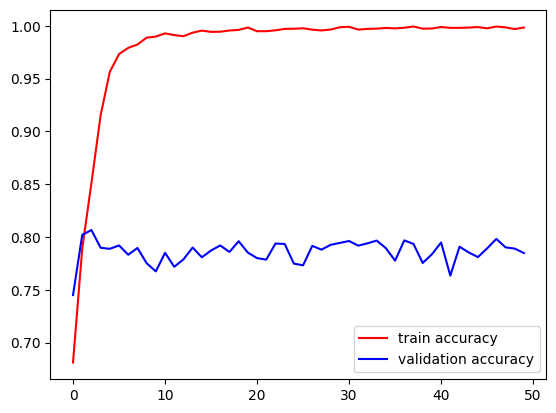

In [ ]:

plt.plot(history.history['accuracy'], color = 'red', label = 'train accuracy')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation accuracy')
plt.legend()

plt.show()

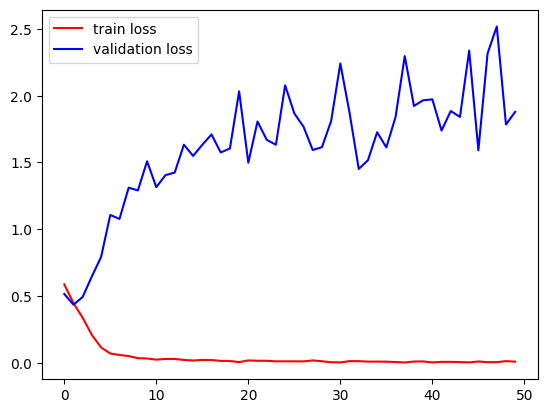

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], color = 'red', label = 'train loss')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation loss')
plt.legend()
# plt.savefig("/kaggle/working/models/Simple_CNN/loss")
plt.show()

In [ ]:
# Evaluate the model on the testing data
test_loss, test_accuracy = model.evaluate(validation_ds)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

157/157 [==============================] - 9s 56ms/step - loss: 1.8791 - accuracy: 0.7848
Test Loss: 1.8790550231933594
Test Accuracy: 0.7847999930381775


In [ ]:
# Load and preprocess the image
from tensorflow.keras.preprocessing import image

img_path = '//content/drive//My Drive//Cat//dog.jpg'
img = image.load_img(img_path, target_size=(image_width, image_height))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.  # Rescale pixel values to [0, 1]

# Make prediction
prediction = model.predict(img_array)

# Print the prediction
if prediction[0] > 0.5:
    print("Predicted class: Cat")
else:
    print("Predicted class: Dog")

1/1 [==============================] - 0s 77ms/step
Predicted class: Dog
